****Task #5: Exploratory Data Analysis - Sport****

- Perform xploratory Data Analysis on Indian Premier League dataset.
- Try to find out most successfull player,team and factors contributong towards win or loss of a team.
- Suggest a team or player the company should endorse for its products while exploring the data.

# 1. Import Libraries

## 1.1 Import Numpy and Pandas Libraries

In [1]:
import pandas as pd
import numpy as np  

## 1.2 Import Graphs

In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

## 1.3 Import Warnings

In [3]:
import warnings
warnings.filterwarnings('ignore')

# 2. Reading and Understanding the Data

## 2.1 Matches Data

### 2.1.1 Reading Matches Data

In [4]:
matches_data = pd.read_csv("matches.csv")
matches_data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


### 2.1.2 Understanding Matches Data

In [5]:
matches_data.shape

(756, 18)

In [6]:
matches_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [7]:
matches_data.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


## 2.1.3 Cleaning Matches Data

#### A. Fixing the Data Index

In [8]:
matches_data.set_index('id', inplace=True)

#### B. Checking Null Values

In [9]:
round(100*(matches_data.isnull().sum())/len(matches_data), 2)

season              0.00
city                0.93
date                0.00
team1               0.00
team2               0.00
toss_winner         0.00
toss_decision       0.00
result              0.00
dl_applied          0.00
winner              0.53
win_by_runs         0.00
win_by_wickets      0.00
player_of_match     0.53
venue               0.00
umpire1             0.26
umpire2             0.26
umpire3            84.26
dtype: float64

In [10]:
matches_data[matches_data.city.isnull()][['city','venue']]

,city,venue
id,,
462,NaN,Dubai International Cricket Stadium
463,NaN,Dubai International Cricket Stadium
467,NaN,Dubai International Cricket Stadium
469,NaN,Dubai International Cricket Stadium
470,NaN,Dubai International Cricket Stadium
475,NaN,Dubai International Cricket Stadium
477,NaN,Dubai International Cricket Stadium


In [11]:
matches_data[(matches_data.umpire1.isnull()) | (matches_data.umpire2.isnull())]

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN


In [12]:
matches_data[(matches_data.winner.isnull()) | (matches_data.player_of_match.isnull())]

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN
11340,2019,Bengaluru,30/04/19,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe,Anil Chaudhary


#### C. Fixing Null Values

In [13]:
matches_data.winner = matches_data.winner.fillna('None')
matches_data.player_of_match = matches_data.player_of_match.fillna('None')
matches_data.city = matches_data.city.fillna('Dubai')
matches_data.umpire1 = matches_data.umpire1.fillna('Other')
matches_data.umpire2 = matches_data.umpire2.fillna('Other')

In [14]:
matches_data = matches_data.drop(columns=["umpire3"],axis=1)

In [15]:
round(100*(matches_data.isnull().sum())/len(matches_data), 2)

season             0.0
city               0.0
date               0.0
team1              0.0
team2              0.0
toss_winner        0.0
toss_decision      0.0
result             0.0
dl_applied         0.0
winner             0.0
win_by_runs        0.0
win_by_wickets     0.0
player_of_match    0.0
venue              0.0
umpire1            0.0
umpire2            0.0
dtype: float64

#### D. Formating the Column Values

In [16]:
city_venue = matches_data.groupby(['city','venue']).count()['season']
city_venue_df = pd.DataFrame(city_venue)
city_venue_df

season
city           venue                                                     
Abu Dhabi      Sheikh Zayed Stadium                                     7
Ahmedabad      Sardar Patel Stadium, Motera                            12
Bangalore      M Chinnaswamy Stadium                                   66
Bengaluru      M Chinnaswamy Stadium                                    7
               M. Chinnaswamy Stadium                                   7
Bloemfontein   OUTsurance Oval                                          2
Cape Town      Newlands                                                 7
Centurion      SuperSport Park                                         12
Chandigarh     Punjab Cricket Association IS Bindra Stadium, M...      11
               Punjab Cricket Association Stadium, Mohali              35
Chennai        M. A. Chidambaram Stadium                                8
               MA Chidambaram Stadium, Chepauk                         49
Cuttack        Barabati Stadium                                         7
Delhi          Feroz Shah Kotla                                        67
               Feroz Shah Kotla Ground                                  7
Dharamsala     Himachal Pradesh Cricket Association Stadium             9
Dubai          Dubai International Cricket Stadium                      7
Durban         Kingsmead                                               15
East London    Buffalo Park                                             3
Hyderabad      Rajiv Gandhi International Stadium, Uppal               56
               Rajiv Gandhi Intl. Cricket Stadium                       8
Indore         Holkar Cricket Stadium                                   9
Jaipur         Sawai Mansingh Stadium                                  47
Johannesburg   New Wanderers Stadium                                    8
Kanpur         Green Park                                               4
Kimberley      De Beers Diamond Oval                                    3
Kochi          Nehru Stadium                                            5
Kolkata        Eden Gardens                                            77
Mohali         IS Bindra Stadium                                        7
               Punjab Cricket Association IS Bindra Stadium, M...       3
Mumbai         Brabourne Stadium                                       11
               Dr DY Patil Sports Academy                              17
               Wankhede Stadium                                        73
Nagpur         Vidarbha Cricket Association Stadium, Jamtha             3
Port Elizabeth St George's Park                                         7
Pune           Maharashtra Cricket Association Stadium                 21
               Subrata Roy Sahara Stadium                              17
Raipur         Shaheed Veer Narayan Singh International Stadium         6
Rajkot         Saurashtra Cricket Association Stadium                  10
Ranchi         JSCA International Stadium Complex                       7
Sharjah        Sharjah Cricket Stadium                                  6
Visakhapatnam  ACA-VDCA Stadium                                         2
               Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Sta...      11

In [17]:
matches_data['team1'] = matches_data['team1'].replace(['Rising Pune Supergiant'],'Rising Pune Supergiants')
matches_data['team2'] = matches_data['team2'].replace(['Rising Pune Supergiant'],'Rising Pune Supergiants')
matches_data['city'] = matches_data['city'].replace(['Bangalore'],'Bengaluru')
matches_data['city'] = matches_data['city'].replace(['Mohali'],'Chandigarh')
matches_data['venue'] = matches_data['venue'].replace(['M Chinnaswamy Stadium'],'M. Chinnaswamy Stadium')
matches_data['venue'] = matches_data['venue'].replace(['MA Chidambaram Stadium, Chepauk'],'M. A. Chidambaram Stadium')
matches_data['venue'] = matches_data['venue'].replace(['Punjab Cricket Association IS Bindra Stadium, Mohali'],'IS Bindra Stadium')
matches_data['venue'] = matches_data['venue'].replace(['Punjab Cricket Association Stadium, Mohali'],'IS Bindra Stadium')
matches_data['venue'] = matches_data['venue'].replace(['ACA-VDCA Stadium'],'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium')
matches_data['venue'] = matches_data['venue'].replace(['Subrata Roy Sahara Stadium'],'Maharashtra Cricket Association Stadium')
matches_data['venue'] = matches_data['venue'].replace(['Feroz Shah Kotla Ground'],'Feroz Shah Kotla')
matches_data['venue'] = matches_data['venue'].replace(['Rajiv Gandhi International Stadium, Uppal'],'Rajiv Gandhi Intl. Cricket Stadium')
matches_data['venue'] = matches_data['venue'].replace(['Subrata Roy Sahara Stadium'],'Maharashtra Cricket Association Stadium')

In [18]:
city_venue = matches_data.groupby(['city','venue']).count()['season']
city_venue_df = pd.DataFrame(city_venue)
city_venue_df

,,season
city,venue,
Abu Dhabi,Sheikh Zayed Stadium,7
Ahmedabad,"Sardar Patel Stadium, Motera",12
Bengaluru,M. Chinnaswamy Stadium,80
Bloemfontein,OUTsurance Oval,2
Cape Town,Newlands,7
Centurion,SuperSport Park,12
Chandigarh,IS Bindra Stadium,56
Chennai,M. A. Chidambaram Stadium,57
Cuttack,Barabati Stadium,7


### 2.1.4 New Matches Dataset

In [19]:
matches_data.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
id,,,,,,,,,,,,,,,,
1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,Rajiv Gandhi Intl. Cricket Stadium,AY Dandekar,NJ Llong
2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
4,2017,Indore,2017-04-08,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
5,2017,Bengaluru,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M. Chinnaswamy Stadium,Other,Other


## 2.2 Deliveries Dataset

### 2.2.1 Reading Deliveries Data

In [20]:
deliveries_data = pd.read_csv("deliveries.csv")
deliveries_data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


### 2.2.2 Understanding Deliveries Dataset

In [21]:
deliveries_data.shape

(179078, 21)

In [22]:
deliveries_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [23]:
deliveries_data.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


### 2.2.3 Cleaning Deliveries Data

#### A. Checking Null Values

In [24]:
round(100*(deliveries_data.isnull().sum())/len(deliveries_data), 2)

match_id             0.00
inning               0.00
batting_team         0.00
bowling_team         0.00
over                 0.00
ball                 0.00
batsman              0.00
non_striker          0.00
bowler               0.00
is_super_over        0.00
wide_runs            0.00
bye_runs             0.00
legbye_runs          0.00
noball_runs          0.00
penalty_runs         0.00
batsman_runs         0.00
extra_runs           0.00
total_runs           0.00
player_dismissed    95.07
dismissal_kind      95.07
fielder             96.40
dtype: float64

In [25]:
deliveries_data[(deliveries_data.player_dismissed.isnull()) | (deliveries_data.dismissal_kind.isnull())]

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179071,11415,2,Chennai Super Kings,Mumbai Indians,19,6,RA Jadeja,SR Watson,JJ Bumrah,0,...,4,0,0,0,4,4,8,NaN,NaN,NaN
179072,11415,2,Chennai Super Kings,Mumbai Indians,20,1,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [26]:
#deliveries_data.player_dismissed = deliveries_data.player_dismissed.fillna('NA')
#deliveries_data.dismissal_kind = deliveries_data.dismissal_kind.fillna('NA')
#deliveries_data.fielder = deliveries_data.fielder.fillna('NA')

In [27]:
round(100*(deliveries_data.isnull().sum())/len(deliveries_data), 2)

match_id             0.00
inning               0.00
batting_team         0.00
bowling_team         0.00
over                 0.00
ball                 0.00
batsman              0.00
non_striker          0.00
bowler               0.00
is_super_over        0.00
wide_runs            0.00
bye_runs             0.00
legbye_runs          0.00
noball_runs          0.00
penalty_runs         0.00
batsman_runs         0.00
extra_runs           0.00
total_runs           0.00
player_dismissed    95.07
dismissal_kind      95.07
fielder             96.40
dtype: float64

## 2.3 IPL Dataset

### 2.3.1 Merging Two Dataset

In [28]:
# Merging the 2 datasets
ipl_data = pd.merge(deliveries_data,matches_data,how='inner', left_on='match_id', right_on ='id')
ipl_data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,Rajiv Gandhi Intl. Cricket Stadium,AY Dandekar,NJ Llong
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,Rajiv Gandhi Intl. Cricket Stadium,AY Dandekar,NJ Llong
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,Rajiv Gandhi Intl. Cricket Stadium,AY Dandekar,NJ Llong
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,Rajiv Gandhi Intl. Cricket Stadium,AY Dandekar,NJ Llong
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,Rajiv Gandhi Intl. Cricket Stadium,AY Dandekar,NJ Llong


### 2.3.2 Understanding Merged Dataset

In [29]:
ipl_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179078 entries, 0 to 179077
Data columns (total 37 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [30]:
ipl_data.describe(include='all')

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
count,179078.000000,179078.000000,179078,179078,179078.000000,179078.000000,179078,179078,179078,179078.000000,...,179078,179078,179078.000000,179078,179078.000000,179078.000000,179078,179078,179078,179078
unique,NaN,NaN,15,15,NaN,NaN,516,511,405,NaN,...,2,3,NaN,16,NaN,NaN,227,33,62,66
top,NaN,NaN,Mumbai Indians,Mumbai Indians,NaN,NaN,V Kohli,SK Raina,Harbhajan Singh,NaN,...,field,normal,NaN,Mumbai Indians,NaN,NaN,CH Gayle,M. Chinnaswamy Stadium,HDPK Dharmasena,S Ravi
freq,NaN,NaN,22619,22517,NaN,NaN,4211,4173,3451,NaN,...,109222,176372,NaN,26305,NaN,NaN,4949,18403,17486,13727
mean,1802.252957,1.482952,NaN,NaN,10.162488,3.615587,NaN,NaN,NaN,0.000452,...,NaN,NaN,0.017914,NaN,13.404036,3.261579,NaN,NaN,NaN,NaN
std,3472.322805,0.502074,NaN,NaN,5.677684,1.806966,NaN,NaN,NaN,0.021263,...,NaN,NaN,0.132639,NaN,23.261007,3.347033,NaN,NaN,NaN,NaN
min,1.000000,1.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,0.000000,...,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,190.000000,1.000000,NaN,NaN,5.000000,2.000000,NaN,NaN,NaN,0.000000,...,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,379.000000,1.000000,NaN,NaN,10.000000,4.000000,NaN,NaN,NaN,0.000000,...,NaN,NaN,0.000000,NaN,0.000000,3.000000,NaN,NaN,NaN,NaN
75%,567.000000,2.000000,NaN,NaN,15.000000,5.000000,NaN,NaN,NaN,0.000000,...,NaN,NaN,0.000000,NaN,19.000000,6.000000,NaN,NaN,NaN,NaN


# 3. Visualizing the Data

## 3.1 City Wise Stadium Analysis

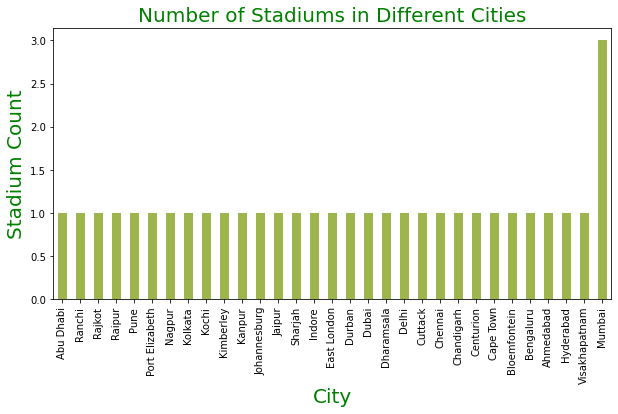

In [31]:
matches_data.groupby('city')['venue'].nunique().sort_values(ascending = True).plot(kind='bar',figsize=(10,5),color='#9eb54e')
plt.title('Number of Stadiums in Different Cities',fontdict={'fontsize':20,'fontweight':5,'color':'green'})
plt.ylabel("Stadium Count", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.xlabel("City", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.show()

## 3.2 City Wise Matches Analysis

In [32]:
matches_data.groupby('city')['venue'].count()

city
Abu Dhabi           7
Ahmedabad          12
Bengaluru          80
Bloemfontein        2
Cape Town           7
Centurion          12
Chandigarh         56
Chennai            57
Cuttack             7
Delhi              74
Dharamsala          9
Dubai               7
Durban             15
East London         3
Hyderabad          64
Indore              9
Jaipur             47
Johannesburg        8
Kanpur              4
Kimberley           3
Kochi               5
Kolkata            77
Mumbai            101
Nagpur              3
Port Elizabeth      7
Pune               38
Raipur              6
Rajkot             10
Ranchi              7
Sharjah             6
Visakhapatnam      13
Name: venue, dtype: int64

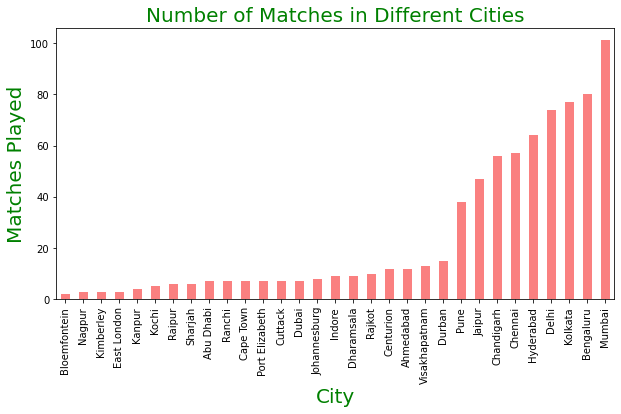

In [33]:
matches_data.groupby('city')['venue'].count().sort_values(ascending = True).plot(kind='bar',figsize=(10,5),color='#FA8080')
plt.title('Number of Matches in Different Cities',fontdict={'fontsize':20,'fontweight':5,'color':'green'})
plt.ylabel("Matches Played", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.xlabel("City", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.show()

## 3.3 Season Wise Match Analysis

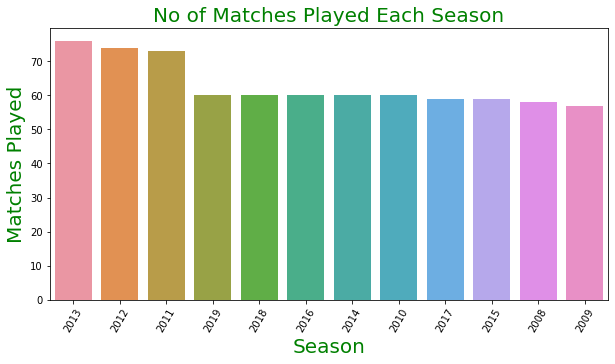

In [34]:
plt.figure(figsize=(10,5))
sns.countplot(matches_data['season'],order = matches_data['season'].value_counts().index)
plt.xticks(rotation = 60)
plt.title('No of Matches Played Each Season',fontdict={'fontsize':20,'fontweight':5,'color':'green'})
plt.ylabel("Matches Played", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.xlabel("Season", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.show()

## 3.4 Stadium Wise Match Analysis

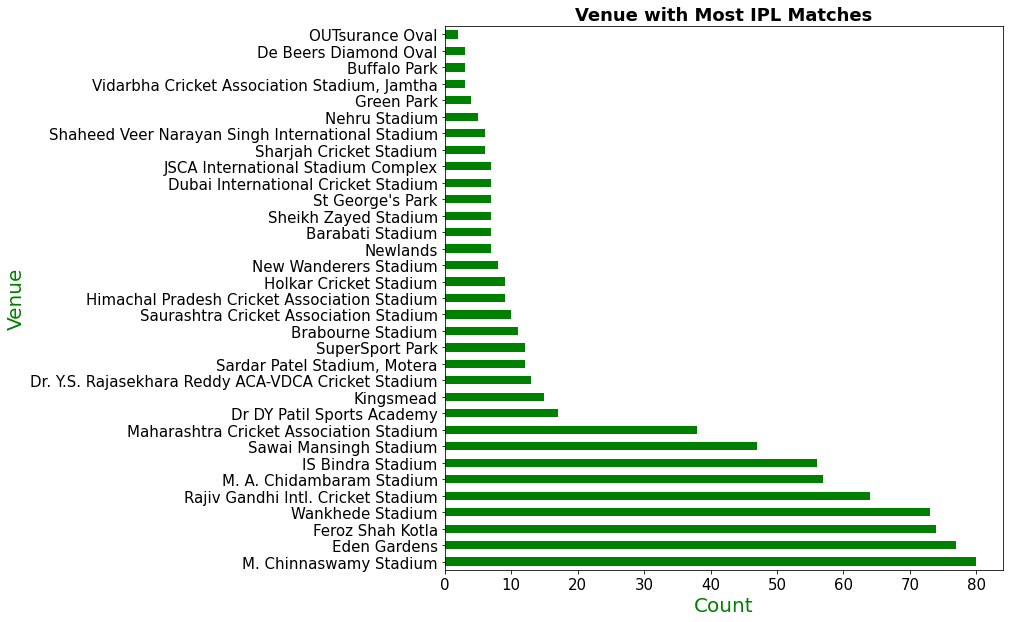

In [35]:
matches_data.venue.value_counts().plot(kind = 'barh',figsize=(10,10), fontsize=15, color='green')
plt.title("Venue with Most IPL Matches",fontsize=18,fontweight="bold")
plt.ylabel("Venue", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.xlabel("Count", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.show()

## 3.5 Season Wise Team Played

In [36]:
matches_data.groupby('season')['team1'].nunique()

season
2008     8
2009     8
2010     8
2011    10
2012     9
2013     9
2014     8
2015     8
2016     8
2017     8
2018     8
2019     8
Name: team1, dtype: int64

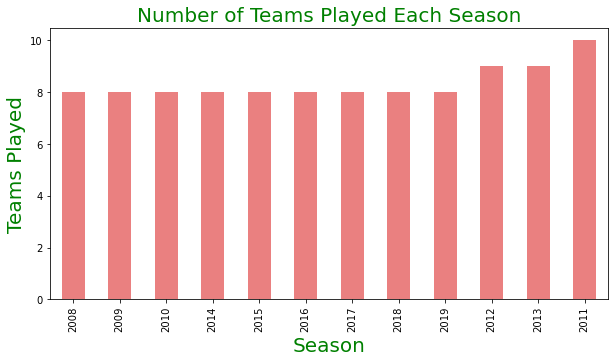

In [37]:
matches_data.groupby('season')['team1'].nunique().sort_values(ascending = True).plot(kind='bar',figsize=(10,5),color='#EA8080')
plt.title('Number of Teams Played Each Season',fontdict={'fontsize':20,'fontweight':5,'color':'green'})
plt.ylabel("Teams Played", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.xlabel("Season", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.show()

## 3.6 No. Matches Won By Team

In [38]:
matches_data.groupby('winner')['team1'].count()

winner
Chennai Super Kings            100
Deccan Chargers                 29
Delhi Capitals                  10
Delhi Daredevils                67
Gujarat Lions                   13
Kings XI Punjab                 82
Kochi Tuskers Kerala             6
Kolkata Knight Riders           92
Mumbai Indians                 109
None                             4
Pune Warriors                   12
Rajasthan Royals                75
Rising Pune Supergiant          10
Rising Pune Supergiants          5
Royal Challengers Bangalore     84
Sunrisers Hyderabad             58
Name: team1, dtype: int64

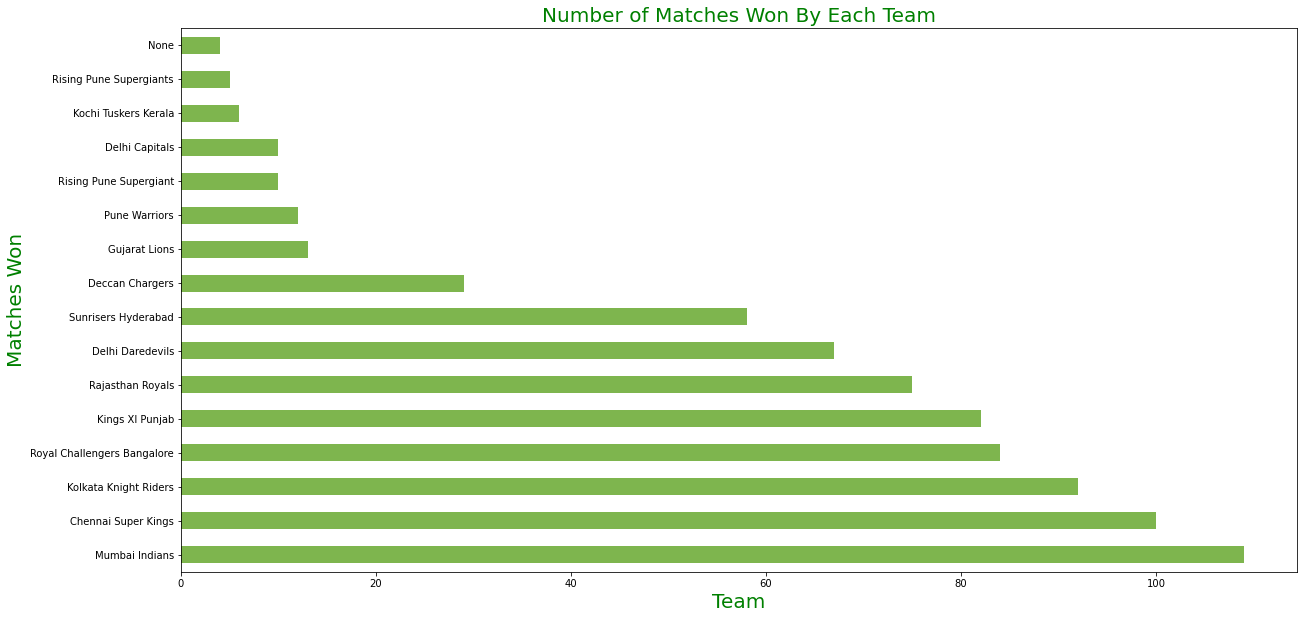

In [39]:
matches_data.groupby('winner')['team1'].count().sort_values(ascending = False).plot(kind='barh',figsize=(20,10),color='#7eb54e')
plt.title('Number of Matches Won By Each Team',fontdict={'fontsize':20,'fontweight':5,'color':'green'})
plt.ylabel("Matches Won", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.xlabel("Team", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.show()

## 3.7 Toss Decision

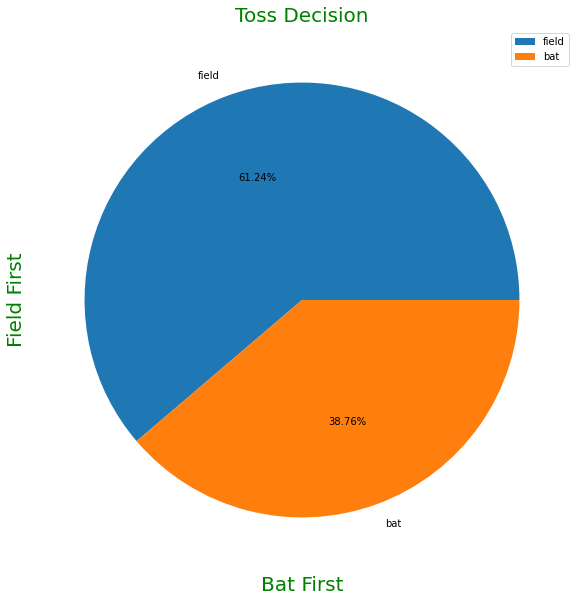

In [40]:
plt.title('Toss Decision',fontdict={'fontsize':20,'fontweight':5,'color':'green'})
matches_data['toss_decision'].value_counts().plot(kind='pie', autopct='%0.2f%%',figsize=(20,10),legend=True)
plt.ylabel("Field First", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.xlabel("Bat First", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.show()

## 3.9 Match Result After Toss Decision

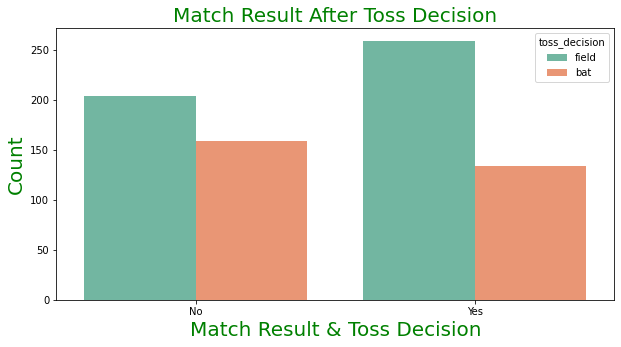

In [41]:
matches_data['matches_toss_win_game'] = np.where((matches_data.toss_winner==matches_data.winner),'Yes','No')
plt.figure(figsize=(10,5))
sns.countplot(matches_data['matches_toss_win_game'],data=matches_data,hue='toss_decision',palette='Set2')
plt.title('Match Result After Toss Decision',fontdict={'fontsize':20,'fontweight':5,'color':'green'})
plt.ylabel("Count", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.xlabel("Match Result & Toss Decision", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.show()

## 3.10 Team Decision After Wining Toss

In [42]:
matches_data['win_by'] = np.where(matches_data['win_by_wickets']>0,'Bowl First','Bat_First')

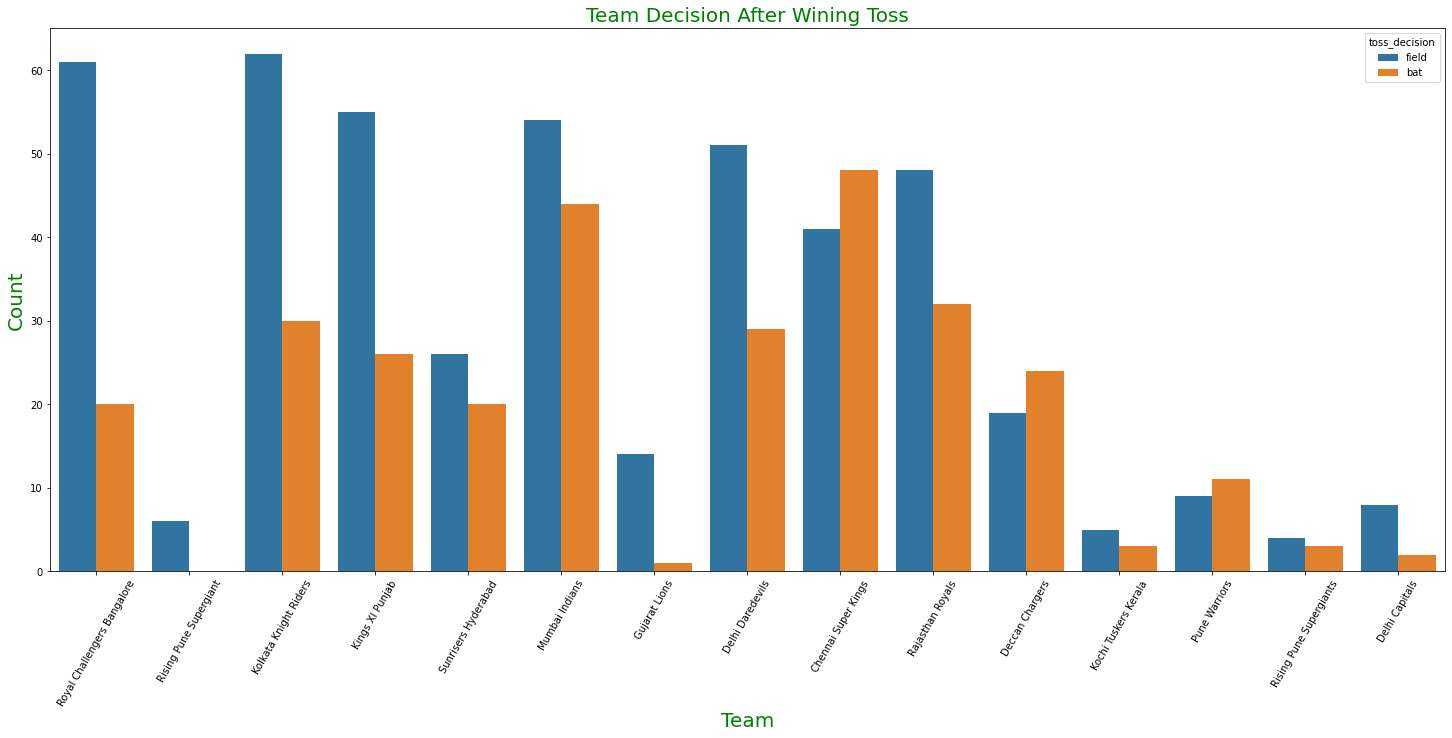

In [43]:
plt.figure(figsize=(25,10))
plt.xticks(rotation=60)
sns.countplot(matches_data['toss_winner'],data=matches_data,hue='toss_decision')
plt.title('Team Decision After Wining Toss',fontdict={'fontsize':20,'fontweight':5,'color':'green'})
plt.ylabel("Count", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.xlabel("Team", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.show()

## 3.11 Match Result Based on Toss Decision

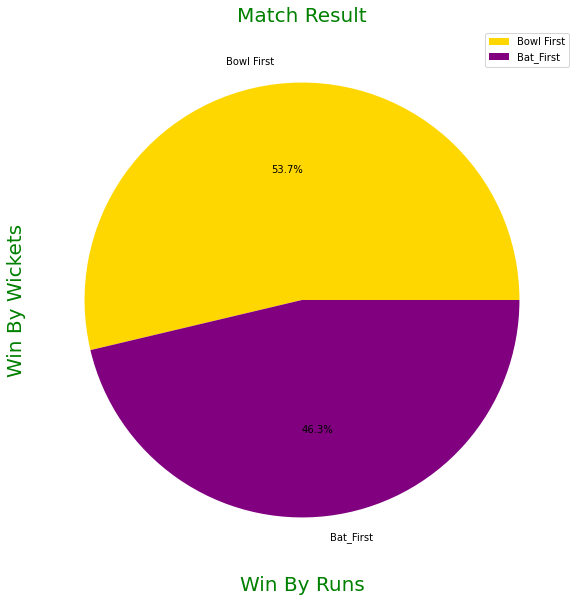

In [44]:
plt.title('Match Result',fontdict={'fontsize':20,'fontweight':5,'color':'green'})
matches_data['win_by'].value_counts().plot(kind='pie', autopct='%1.1f%%',figsize=(20,10),
                                           legend=True,colors = ['gold', 'purple'])

plt.ylabel("Win By Wickets", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.xlabel("Win By Runs", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.show()

## 3.12 Matches Won After Batting or Bowling First

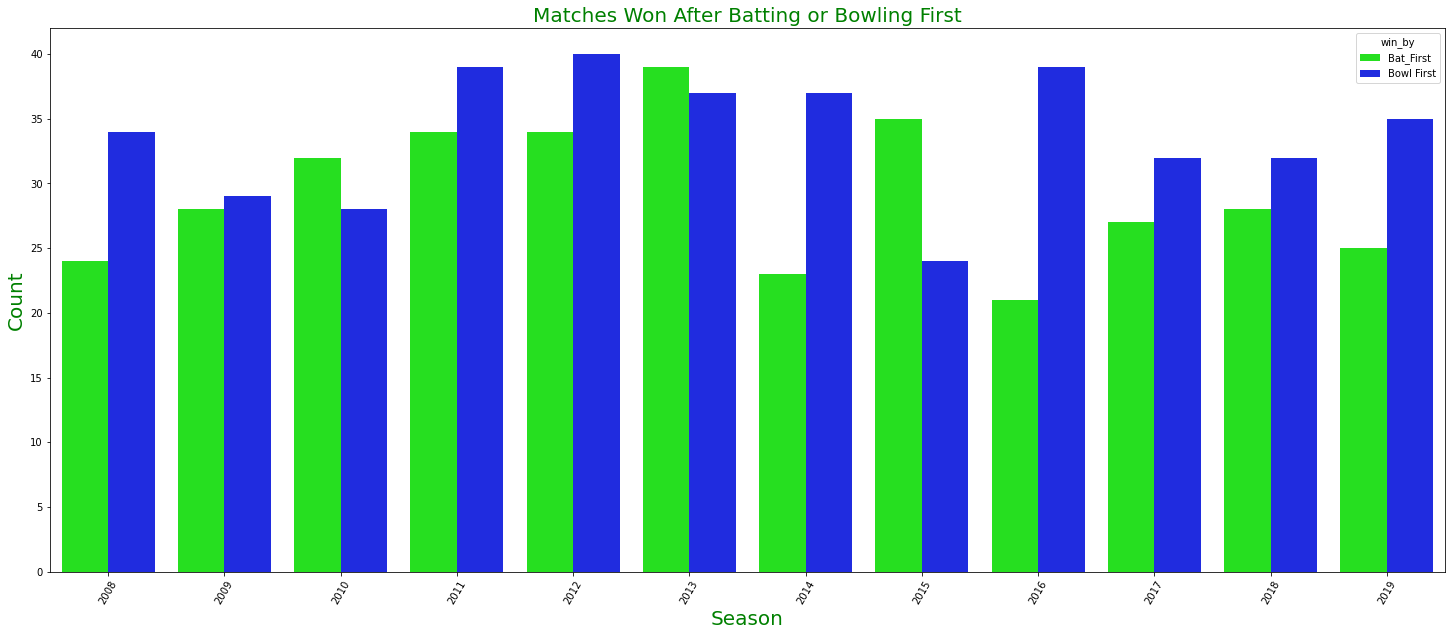

In [45]:
plt.figure(figsize=(25,10))
plt.xticks(rotation=60)
sns.countplot(matches_data['season'],data=matches_data,hue='win_by',palette='hsv')
plt.title('Matches Won After Batting or Bowling First',fontdict={'fontsize':20,'fontweight':5,'color':'green'})
plt.ylabel("Count", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.xlabel("Season", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.show()

## 3.13 Final Match Toss Decision

In [46]:
ipl_winners= matches_data.drop_duplicates(subset=['season'],keep='last')
ipl_winners[['season','winner','win_by','toss_decision','player_of_match']].reset_index(drop=True).sort_values('season')

,season,winner,win_by,toss_decision,player_of_match
1,2008,Rajasthan Royals,Bowl First,field,YK Pathan
2,2009,Deccan Chargers,Bat_First,field,A Kumble
3,2010,Chennai Super Kings,Bat_First,bat,SK Raina
4,2011,Chennai Super Kings,Bat_First,bat,M Vijay
5,2012,Kolkata Knight Riders,Bowl First,bat,MS Bisla
6,2013,Mumbai Indians,Bat_First,bat,KA Pollard
7,2014,Kolkata Knight Riders,Bowl First,field,MK Pandey
8,2015,Mumbai Indians,Bat_First,field,RG Sharma
9,2016,Sunrisers Hyderabad,Bat_First,bat,BCJ Cutting
0,2017,Mumbai Indians,Bat_First,bat,KH Pandya


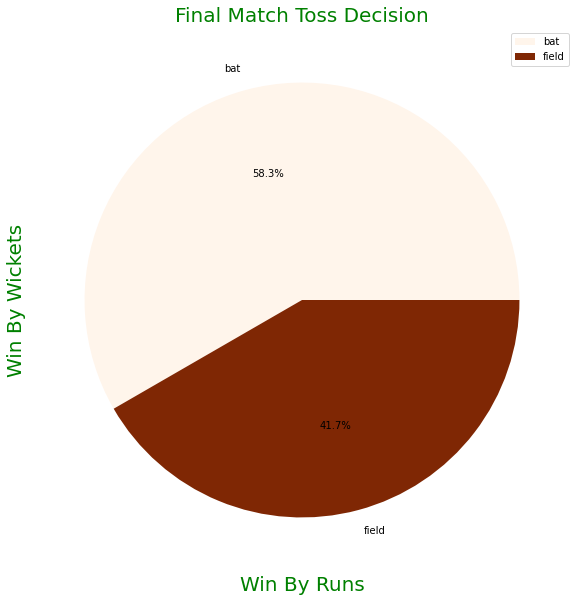

In [47]:
plt.title('Final Match Toss Decision',fontdict={'fontsize':20,'fontweight':5,'color':'green'})
ipl_winners['toss_decision'].value_counts().plot(kind='pie', autopct='%1.1f%%',figsize=(20,10),legend=True,cmap='Oranges')
plt.ylabel("Win By Wickets", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.xlabel("Win By Runs", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.show()

## 3.13 Final Match Result Based on Toss Decision

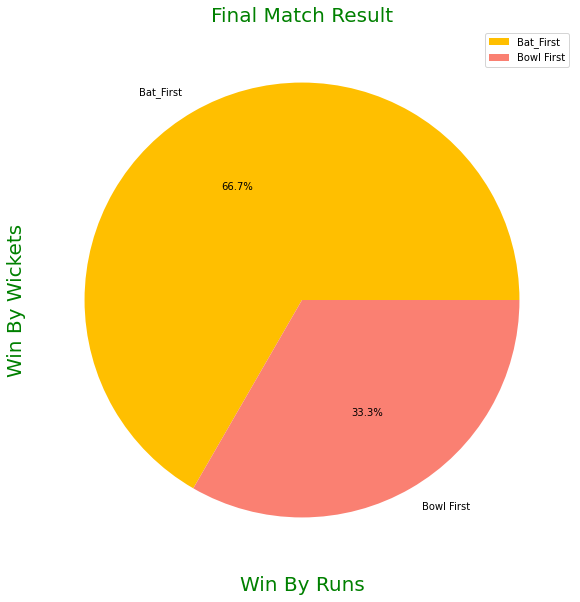

In [48]:
plt.title('Final Match Result',fontdict={'fontsize':20,'fontweight':5,'color':'green'})
ipl_winners['win_by'].value_counts().plot(kind='pie', autopct='%1.1f%%',figsize=(20,10),
                                          legend=True,colors = ['#FFBF00', '#FA8072'])
plt.ylabel("Win By Wickets", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.xlabel("Win By Runs", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.show()

## 3.14 Season Wise IPL Winners

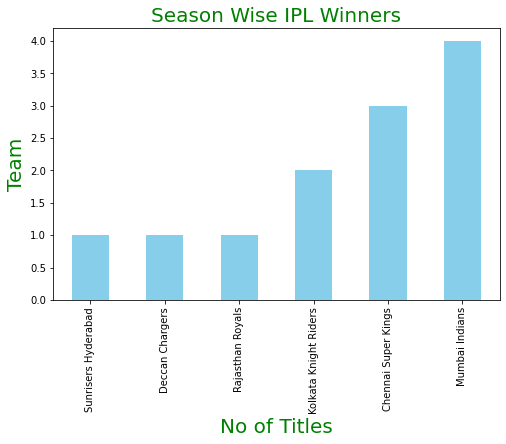

In [49]:
ipl_winners['winner'].value_counts().sort_values(ascending = True).plot(kind='bar',figsize=(8,5),color = 'skyblue')
plt.title('Season Wise IPL Winners',fontdict={'fontsize':20,'fontweight':5,'color':'green'})
plt.ylabel("Team", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.xlabel("No of Titles", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.show()

## 3.15 Match Winner in IPL Final for Each Team

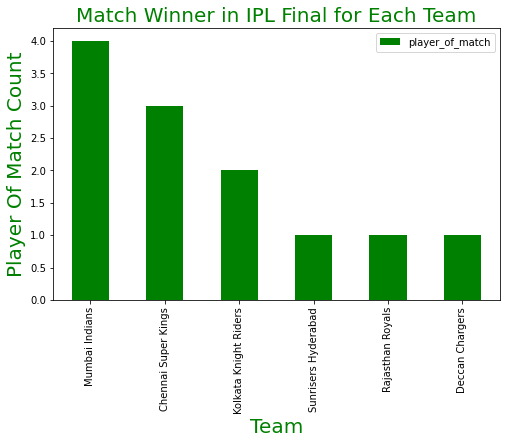

In [50]:
ipl_winners.groupby('winner')['player_of_match'].count().sort_values(ascending = False).plot(kind='bar',figsize=(8,5),
                                                                                             color = 'green',legend=True)

plt.title('Match Winner in IPL Final for Each Team',fontdict={'fontsize':20,'fontweight':5,'color':'green'})
plt.xlabel("Team", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.ylabel("Player Of Match Count", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.show()

## 3.16 Match Winner in IPL Final

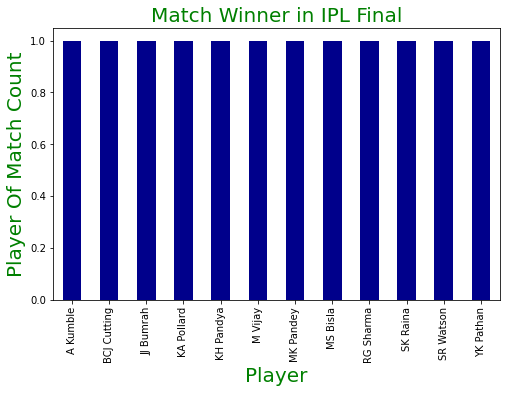

In [51]:
ipl_winners.groupby('player_of_match')['winner'].count().sort_values(ascending = True).plot(kind='bar',figsize=(8,5)
                                                                                            ,color = 'darkblue')

plt.title('Match Winner in IPL Final',fontdict={'fontsize':20,'fontweight':5,'color':'green'})
plt.xlabel("Player", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.ylabel("Player Of Match Count", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.show()

## 3.17 Top Match Winners

In [52]:
matches_data['player_of_match'].value_counts()[:10]

CH Gayle          21
AB de Villiers    20
DA Warner         17
MS Dhoni          17
RG Sharma         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
AM Rahane         12
Name: player_of_match, dtype: int64

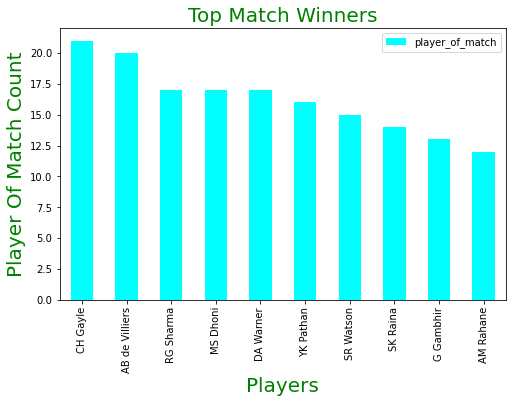

In [53]:
matches_data['player_of_match'].value_counts()[:10].sort_values(ascending = False).plot(kind='bar',figsize=(8,5),
                                                                                        color = 'cyan',legend=True)

plt.title('Top Match Winners',fontdict={'fontsize':20,'fontweight':5,'color':'green'})
plt.xlabel("Players", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.ylabel("Player Of Match Count", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.show()

## 3.18 Most IPL Matches Played

In [54]:
deliveries_data.groupby('player_dismissed')['match_id'].count().sort_values(ascending=False)

player_dismissed
SK Raina         162
RG Sharma        155
RV Uthappa       153
V Kohli          143
S Dhawan         137
                ... 
J Denly            1
J Searles          1
JE Taylor          1
SJ Srivastava      1
M Santner          1
Name: match_id, Length: 487, dtype: int64

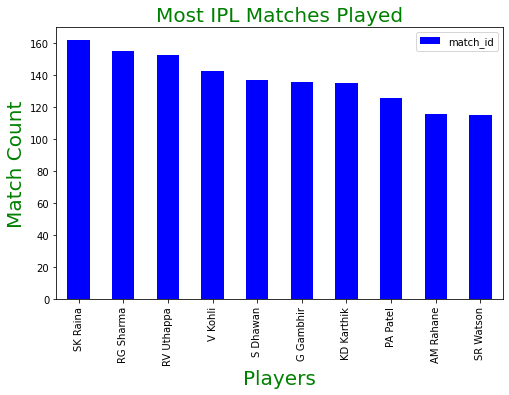

In [55]:
deliveries_data.groupby('player_dismissed')['match_id'].count().sort_values(ascending=False).head(10).plot(kind='bar'
                                                                            ,figsize=(8,5),color = 'blue',legend=True)

plt.title('Most IPL Matches Played',fontdict={'fontsize':20,'fontweight':5,'color':'green'})
plt.xlabel("Players", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.ylabel("Match Count", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.show()

## 3.19 Season Wise Runs Scored

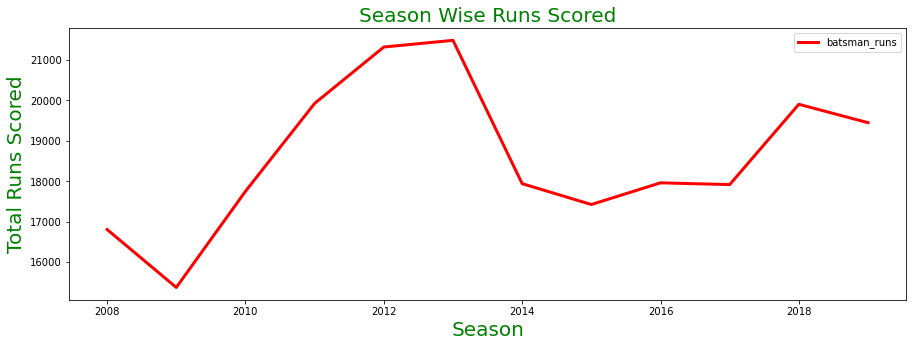

In [56]:
ipl_data.groupby('season')['batsman_runs'].sum().plot(kind = 'line', linewidth = 3, figsize =(15,5),color = 'red',legend=True)
plt.title('Season Wise Runs Scored',fontdict={'fontsize':20,'fontweight':5,'color':'green'})
plt.xlabel("Season", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.ylabel("Total Runs Scored", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.show()

## 3.20 Top Run Scorer in IPL

In [57]:
ipl_data.groupby('batsman')['batsman_runs'].sum().sort_values(ascending = False)

batsman
V Kohli         5434
SK Raina        5415
RG Sharma       4914
DA Warner       4741
S Dhawan        4632
                ... 
J Denly            0
C Nanda            0
RR Bhatkal         0
K Ahmed            0
Abdur Razzak       0
Name: batsman_runs, Length: 516, dtype: int64

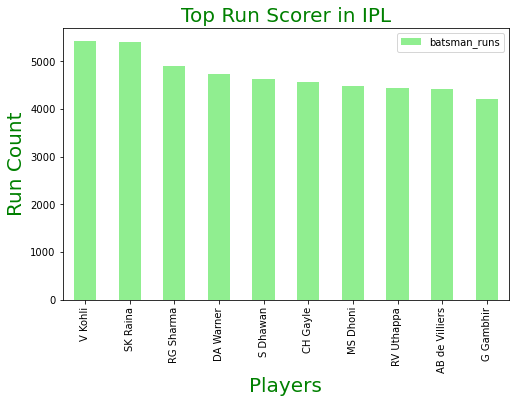

In [58]:
ipl_data.groupby('batsman')['batsman_runs'].sum().sort_values(ascending = False).head(10).plot(kind='bar',figsize=(8,5),
                                                                                    color = 'lightgreen',legend=True)

plt.title('Top Run Scorer in IPL',fontdict={'fontsize':20,'fontweight':5,'color':'green'})
plt.xlabel("Players", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.ylabel("Run Count", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.show()

## 3.20 Total Four Hit by Team in IPL

In [59]:
four_data=ipl_data[ipl_data['batsman_runs']==4]
four_data.groupby('batting_team')['batsman_runs'].agg([('runs by four','sum'),('four','count')])

,runs by four,four
batting_team,,
Chennai Super Kings,8772,2193
Deccan Chargers,3828,957
Delhi Capitals,968,242
Delhi Daredevils,8632,2158
Gujarat Lions,1840,460
Kings XI Punjab,9832,2458
Kochi Tuskers Kerala,680,170
Kolkata Knight Riders,9736,2434
Mumbai Indians,10352,2588


In [60]:
four_data.groupby('batting_team')['batsman_runs'].agg([('four','count')]).sort_values('four',ascending = True)

,four
batting_team,
Kochi Tuskers Kerala,170
Rising Pune Supergiants,171
Rising Pune Supergiant,197
Delhi Capitals,242
Gujarat Lions,460
Pune Warriors,525
Deccan Chargers,957
Sunrisers Hyderabad,1444
Rajasthan Royals,2035


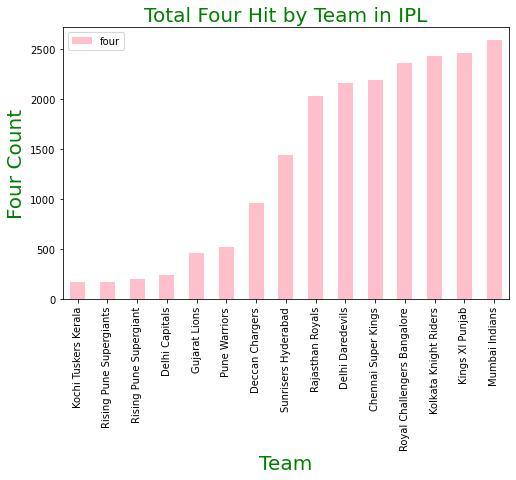

In [61]:
four_data.groupby('batting_team')['batsman_runs'].agg([('four','count')]).sort_values('four',ascending = True).plot(kind='bar'
                                                                                ,figsize=(8,5),color = 'pink',legend=True)

plt.title('Total Four Hit by Team in IPL',fontdict={'fontsize':20,'fontweight':5,'color':'green'})
plt.xlabel("Team", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.ylabel("Four Count", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.show()

## 3.21 Total Four Hit by Player in IPL

In [62]:
four_data.groupby('batsman')['batsman_runs'].agg([('four','count')]).sort_values('four',ascending = False)

,four
batsman,
S Dhawan,526
SK Raina,495
G Gambhir,492
V Kohli,482
DA Warner,459
...,...
Sandeep Sharma,1
S Mavi,1
Shivam Sharma,1


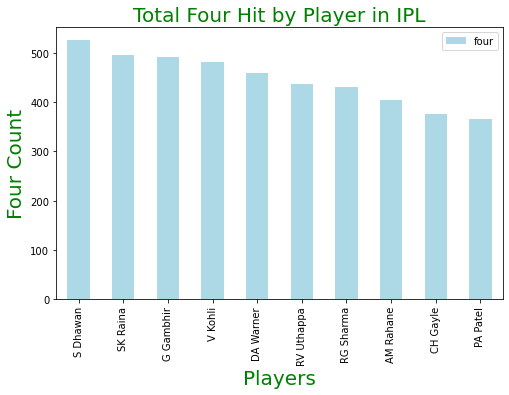

In [63]:
four_data.groupby('batsman')['batsman_runs'].agg([('four','count')]).sort_values('four',ascending = False).head(10).plot(kind='bar'
                                                                ,figsize=(8,5),color = 'lightblue',legend=True)

plt.title('Total Four Hit by Player in IPL',fontdict={'fontsize':20,'fontweight':5,'color':'green'})
plt.xlabel("Players", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.ylabel("Four Count", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.show()

## 3.22 Total Four Hit in IPL

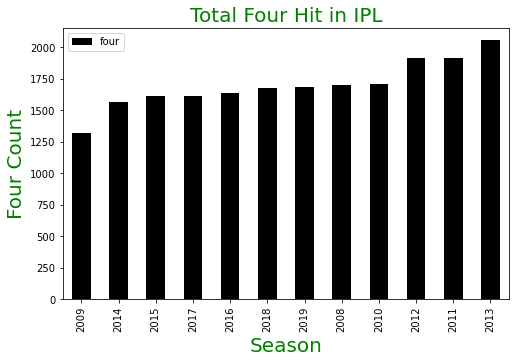

In [64]:
four_data.groupby('season')['batsman_runs'].agg([('four','count')]).sort_values('four',ascending = True).plot(kind='bar',
                                                                                    figsize=(8,5),color = 'black',legend=True)

plt.title('Total Four Hit in IPL',fontdict={'fontsize':20,'fontweight':5,'color':'green'})
plt.xlabel("Season", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.ylabel("Four Count", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.show()

## 3.23 Total Six Hit By Team in IPL

In [65]:
six_data=ipl_data[ipl_data['batsman_runs']==6]
six_data.groupby('batting_team')['batsman_runs'].agg([('runs by six','sum'),('six','count')])

,runs by six,six
batting_team,,
Chennai Super Kings,5838,973
Deccan Chargers,2400,400
Delhi Capitals,522,87
Delhi Daredevils,4806,801
Gujarat Lions,930,155
Kings XI Punjab,5856,976
Kochi Tuskers Kerala,318,53
Kolkata Knight Riders,5580,930
Mumbai Indians,6576,1096


In [66]:
six_data.groupby('batting_team')['batsman_runs'].agg([('six','count')]).sort_values('six',ascending = True)

,six
batting_team,
Kochi Tuskers Kerala,53
Rising Pune Supergiants,68
Delhi Capitals,87
Rising Pune Supergiant,89
Gujarat Lions,155
Pune Warriors,196
Deccan Chargers,400
Sunrisers Hyderabad,533
Rajasthan Royals,681


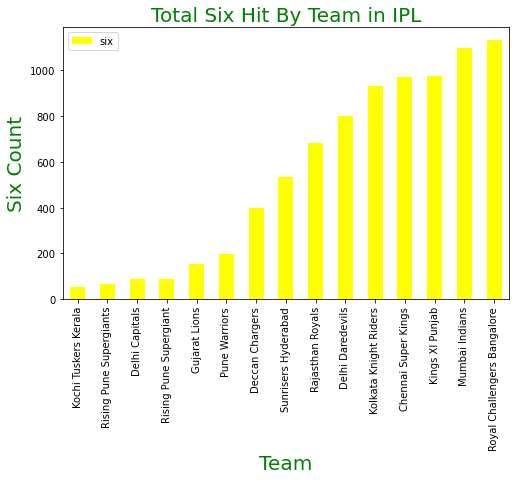

In [67]:
six_data.groupby('batting_team')['batsman_runs'].agg([('six','count')]).sort_values('six',ascending = True).plot(kind='bar',
                                                                            figsize=(8,5),color = 'yellow',legend=True)
                                                                                                        
plt.title('Total Six Hit By Team in IPL',fontdict={'fontsize':20,'fontweight':5,'color':'green'})
plt.xlabel("Team", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.ylabel("Six Count", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.show()

## 3.24 Total Six Hit By Player in IPL

In [68]:
six_data.groupby('batsman')['batsman_runs'].agg([('six','count')]).sort_values('six',ascending = False).head(10)

,six
batsman,
CH Gayle,327
AB de Villiers,214
MS Dhoni,207
SK Raina,195
RG Sharma,194
V Kohli,191
DA Warner,181
SR Watson,177
KA Pollard,175


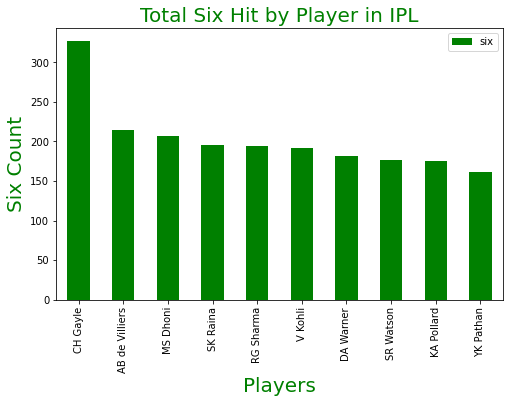

In [69]:
six_data.groupby('batsman')['batsman_runs'].agg([('six','count')]).sort_values('six',ascending = False).head(10).plot(kind='bar',
                                                                                figsize=(8,5),color = 'green',legend=True)

plt.title('Total Six Hit by Player in IPL',fontdict={'fontsize':20,'fontweight':5,'color':'green'})
plt.xlabel("Players", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.ylabel("Six Count", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.show()

## 3.25 Total Six Hit In IPL

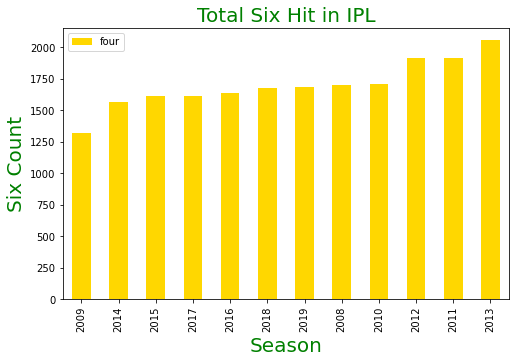

In [70]:
four_data.groupby('season')['batsman_runs'].agg([('four','count')]).sort_values('four',ascending = True).plot(kind='bar',
                                                                                figsize=(8,5),color = 'gold',legend=True)

plt.title('Total Six Hit in IPL',fontdict={'fontsize':20,'fontweight':5,'color':'green'})
plt.xlabel("Season", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.ylabel("Six Count", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.show()

## 3.26 Season Wise Wickets Fallen

In [71]:
ipl_data.groupby('season')['player_dismissed'].count().sort_values(ascending = False).head(10)

season
2013    912
2012    858
2011    813
2010    725
2018    719
2017    711
2009    698
2015    691
2008    690
2019    677
Name: player_dismissed, dtype: int64

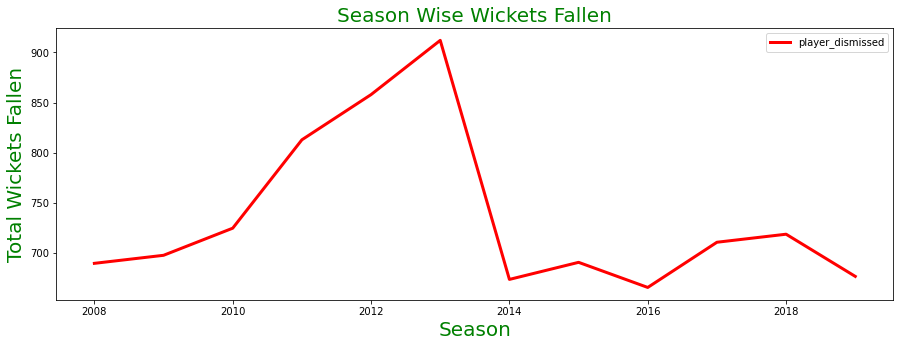

In [72]:
ipl_data.groupby('season')['player_dismissed'].count().plot(kind = 'line', linewidth = 3, figsize =(15,5),color = 'red',legend=True)
plt.title('Season Wise Wickets Fallen' ,fontdict={'fontsize':20,'fontweight':5,'color':'green'})
plt.xlabel("Season", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.ylabel("Total Wickets Fallen", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.show()

## 3.27 Top Wicket Takers in IPL

In [73]:
ipl_data.groupby('bowler')['player_dismissed'].count().sort_values(ascending = False).head(10)

bowler
SL Malinga         188
DJ Bravo           168
A Mishra           165
Harbhajan Singh    161
PP Chawla          156
B Kumar            141
R Ashwin           138
SP Narine          137
UT Yadav           136
R Vinay Kumar      127
Name: player_dismissed, dtype: int64

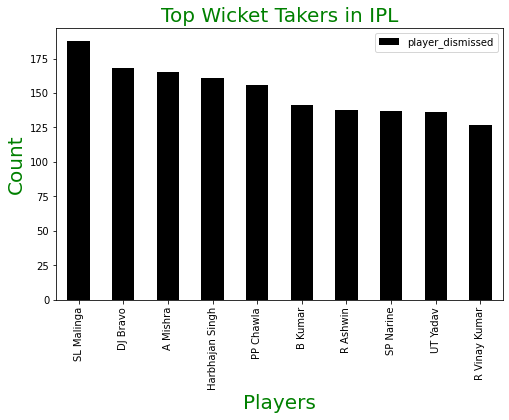

In [74]:
ipl_data.groupby('bowler')['player_dismissed'].count().sort_values(ascending = False).head(10).plot(kind='bar',
                                                                        figsize=(8,5),color = 'black',legend=True)

plt.title('Top Wicket Takers in IPL',fontdict={'fontsize':20,'fontweight':5,'color':'green'})
plt.xlabel("Players", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.ylabel("Count", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.show()

## 3.28 Team Wise Player Dismissed

In [75]:
ipl_data.groupby('team1')['player_dismissed'].count().sort_values(ascending = False).head(10)

team1
Mumbai Indians                 1231
Kings XI Punjab                1095
Chennai Super Kings            1015
Royal Challengers Bangalore     961
Kolkata Knight Riders           941
Delhi Daredevils                811
Rajasthan Royals                795
Sunrisers Hyderabad             742
Deccan Chargers                 530
Pune Warriors                   223
Name: player_dismissed, dtype: int64

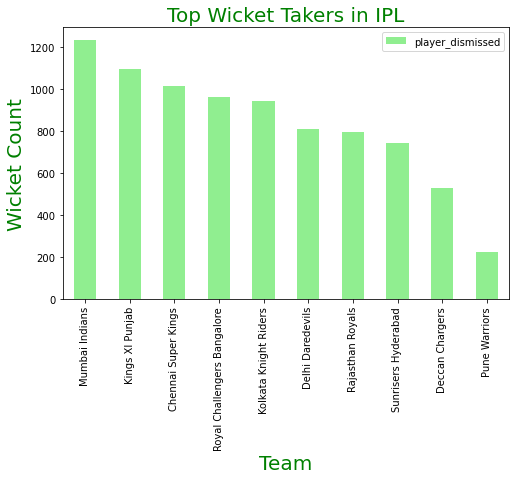

In [76]:
ipl_data.groupby('team1')['player_dismissed'].count().sort_values(ascending = False).head(10).plot(kind='bar',
                                                                                figsize=(8,5),color = 'lightgreen',legend=True)

plt.title('Top Wicket Takers in IPL',fontdict={'fontsize':20,'fontweight':5,'color':'green'})
plt.xlabel("Team", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.ylabel("Wicket Count", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.show()

## 3.29 Most Dismissed Player in IPL

In [77]:
ipl_data.groupby('batsman')['player_dismissed'].count().sort_values(ascending = False).head(10)

batsman
RG Sharma     162
SK Raina      161
RV Uthappa    157
V Kohli       152
KD Karthik    140
S Dhawan      137
G Gambhir     135
PA Patel      127
MS Dhoni      118
AM Rahane     117
Name: player_dismissed, dtype: int64

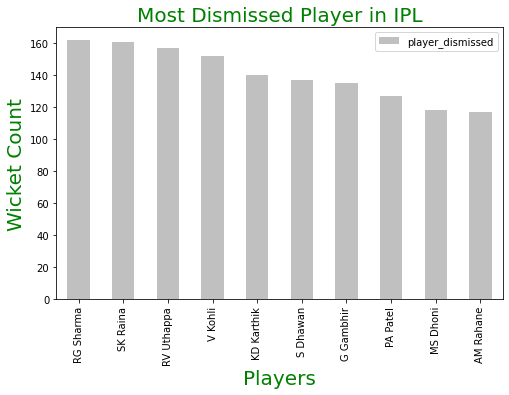

In [78]:
ipl_data.groupby('batsman')['player_dismissed'].count().sort_values(ascending = False).head(10).plot(kind='bar',
                                                                                figsize=(8,5),color = 'silver',legend=True)

plt.title('Most Dismissed Player in IPL',fontdict={'fontsize':20,'fontweight':5,'color':'green'})
plt.xlabel("Players", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.ylabel("Wicket Count", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.show()

## 3.30 Bowler Given Most Extras in IPL

In [79]:
deliveries_data[deliveries_data['extra_runs']!=0]['bowler'].value_counts()[:10]

SL Malinga    221
P Kumar       185
UT Yadav      180
DJ Bravo      176
B Kumar       162
SR Watson     155
I Sharma      151
RP Singh      145
DW Steyn      139
R Ashwin      133
Name: bowler, dtype: int64

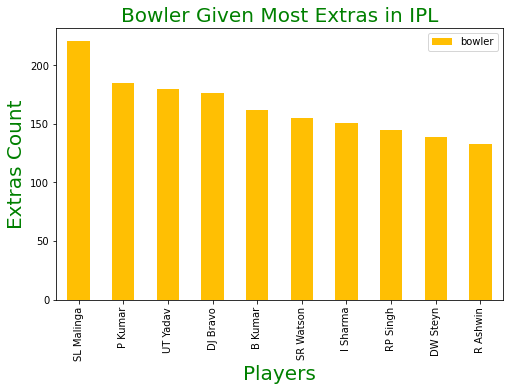

In [80]:
deliveries_data[deliveries_data['extra_runs']!=0]['bowler'].value_counts()[:10].plot(kind='bar',figsize=(8,5),color='#FFBF03',legend=True)
plt.title('Bowler Given Most Extras in IPL',fontdict={'fontsize':20,'fontweight':5,'color':'green'})
plt.xlabel("Players", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.ylabel("Extras Count", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.show()


## 3.31 Team Wise Extras Count in IPL

In [81]:
ipl_data[ipl_data['extra_runs']!=0]['team1'].value_counts()[:10]

Mumbai Indians                 1340
Kings XI Punjab                1206
Royal Challengers Bangalore    1119
Chennai Super Kings            1061
Kolkata Knight Riders          1037
Delhi Daredevils                898
Rajasthan Royals                895
Sunrisers Hyderabad             710
Deccan Chargers                 550
Pune Warriors                   218
Name: team1, dtype: int64

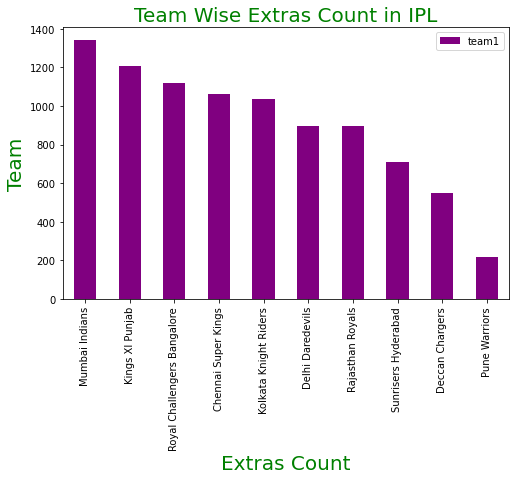

In [82]:
ipl_data[ipl_data['extra_runs']!=0]['team1'].value_counts()[:10].plot(kind='bar',figsize=(8,5),color = 'purple',legend=True)
plt.title('Team Wise Extras Count in IPL',fontdict={'fontsize':20,'fontweight':5,'color':'green'})
plt.ylabel("Team", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.xlabel("Extras Count", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.show()

## 3.32 Season Wise Extras Count in IPL

In [83]:
 ipl_data[ipl_data['extra_runs']!=0]['season'].value_counts()[:10]

2011    936
2012    903
2008    875
2013    874
2010    867
2009    778
2014    773
2015    747
2017    727
2016    716
Name: season, dtype: int64

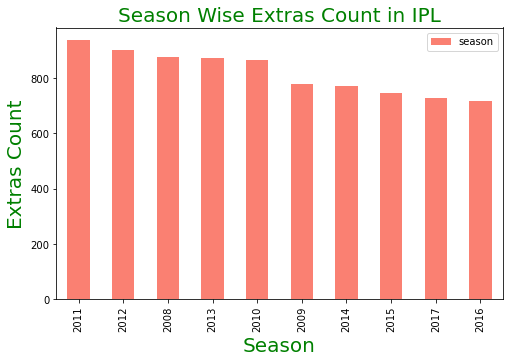

In [84]:
ipl_data[ipl_data['extra_runs']!=0]['season'].value_counts()[:10].plot(kind='bar',figsize=(8,5),color = '#FA8072',legend=True)
plt.title('Season Wise Extras Count in IPL',fontdict={'fontsize':20,'fontweight':5,'color':'green'})
plt.xlabel("Season", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.ylabel("Extras Count", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.show()

## 3.33 Dismissal Type in IPL

In [85]:
ipl_data['dismissal_kind'].value_counts().sort_values(ascending = False)

caught                   5348
bowled                   1581
run out                   852
lbw                       540
stumped                   278
caught and bowled         211
retired hurt               12
hit wicket                 10
obstructing the field       2
Name: dismissal_kind, dtype: int64

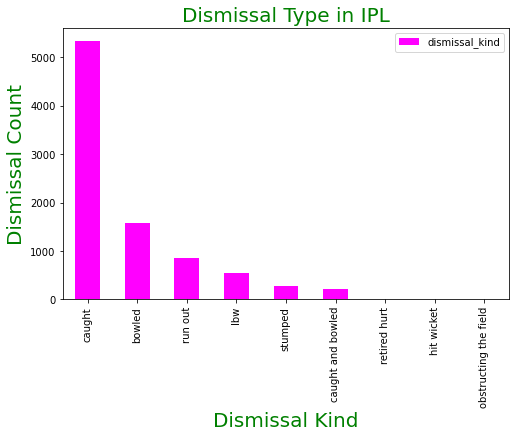

In [86]:
ipl_data['dismissal_kind'].value_counts().sort_values(ascending = False).plot(kind='bar',figsize=(8,5),color = 'magenta',legend=True)
plt.title('Dismissal Type in IPL',fontdict={'fontsize':20,'fontweight':5,'color':'green'})
plt.ylabel("Dismissal Count", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.xlabel("Dismissal Kind", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.show()

## 3.34 Most Dismissal By Player in IPL

In [87]:
ipl_data.groupby(['player_dismissed'])['fielder'].count().sort_values(ascending = False)[:20]

player_dismissed
SK Raina          133
RV Uthappa        123
RG Sharma         115
V Kohli           104
KD Karthik         99
S Dhawan           98
G Gambhir          98
Yuvraj Singh       93
YK Pathan          90
PA Patel           89
AT Rayudu          86
AB de Villiers     83
AM Rahane          82
MS Dhoni           82
DA Warner          80
V Sehwag           78
SR Watson          78
KA Pollard         78
CH Gayle           77
BB McCullum        70
Name: fielder, dtype: int64

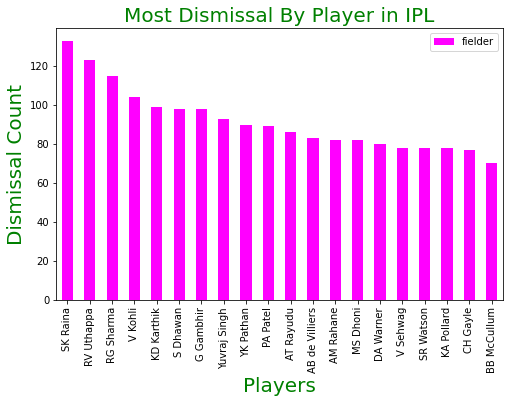

In [88]:
ipl_data.groupby(['player_dismissed'])['fielder'].count().sort_values(ascending = False)[:20].plot(kind='bar',
                                                                                figsize=(8,5),color = 'magenta',legend=True)

plt.title('Most Dismissal By Player in IPL',fontdict={'fontsize':20,'fontweight':5,'color':'green'})
plt.xlabel("Players", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.ylabel("Dismissal Count", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.show()

## 3.35 Best Bating Strike Rate in IPL

In [89]:
# Batsmen with the best strike rates over the years 

balls_faced = pd.DataFrame(ipl_data.groupby('batsman')['ball'].count())
runs_scored = pd.DataFrame(ipl_data.groupby('batsman')['batsman_runs'].sum())
season_played = pd.DataFrame(ipl_data.groupby('batsman')['season'].nunique())

batsman_strike_rate = pd.DataFrame({'balls':balls_faced['ball'],'runs':runs_scored['batsman_runs'],
                                   'seasons':season_played['season']})

batsman_strike_rate.reset_index(inplace = True)
batsman_strike_rate['strike_rate'] = batsman_strike_rate['runs']/batsman_strike_rate['balls']*100
batsman_strike_rate

,batsman,balls,runs,seasons,strike_rate
0,A Ashish Reddy,196,280,4,142.857143
1,A Chandila,7,4,2,57.142857
2,A Chopra,75,53,2,70.666667
3,A Choudhary,20,25,1,125.000000
4,A Dananjaya,5,4,1,80.000000
...,...,...,...,...,...
511,YV Takawale,183,192,3,104.918033
512,Yashpal Singh,67,47,1,70.149254
513,Younis Khan,7,3,1,42.857143
514,Yuvraj Singh,2207,2765,11,125.283190


In [90]:
batsman_strike_rate.groupby('batsman')['strike_rate'].sum().sort_values(ascending = False).head(10)

batsman
B Stanlake       250.000000
Umar Gul         205.263158
RS Sodhi         200.000000
S Sharma         200.000000
AD Russell       179.950187
Shahid Afridi    176.086957
I Malhotra       175.000000
S Curran         172.727273
K Gowtham        172.093023
SN Thakur        171.428571
Name: strike_rate, dtype: float64

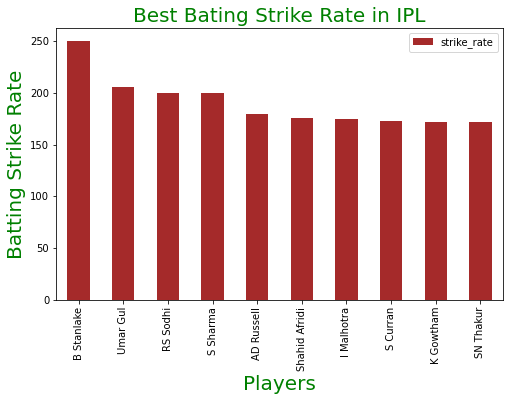

In [91]:
batsman_strike_rate.groupby('batsman')['strike_rate'].sum().sort_values(ascending = False).head(10).plot(kind='bar',
                                                                                figsize=(8,5),color = 'brown',legend=True)

plt.title('Best Bating Strike Rate in IPL',fontdict={'fontsize':20,'fontweight':5,'color':'green'})
plt.xlabel("Players", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.ylabel("Batting Strike Rate", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.show()

## 3.36 Best Bowling Strike Rate in IPL

In [92]:
#strike_rate = balls bowled by wickets taken
balls_bowled = pd.DataFrame(ipl_data.groupby('bowler')['ball'].count())
wickets_taken = pd.DataFrame(ipl_data[ipl_data['dismissal_kind'] != 'no dismissal'].groupby('bowler')['dismissal_kind'].count())
seasons_played = pd.DataFrame(ipl_data.groupby('bowler')['season'].nunique())

bowler_strike_rate = pd.DataFrame({'balls':balls_bowled['ball'],'wickets':wickets_taken['dismissal_kind'],
                          'season':seasons_played['season']})
bowler_strike_rate.reset_index(inplace = True)

bowler_strike_rate['strike_rate'] = bowler_strike_rate['balls']/bowler_strike_rate['wickets']
bowler_strike_rate.groupby('bowler')['strike_rate'].sum().sort_values(ascending = True).head(10)

bowler
AC Gilchrist      1.000000
Sachin Baby       3.333333
AM Rahane         6.000000
SS Mundhe         7.000000
LA Carseldine     7.000000
DAJ Bracewell     8.333333
L Ablish          9.000000
A Joseph          9.166667
Shoaib Akhtar     9.200000
T Curran         10.666667
Name: strike_rate, dtype: float64

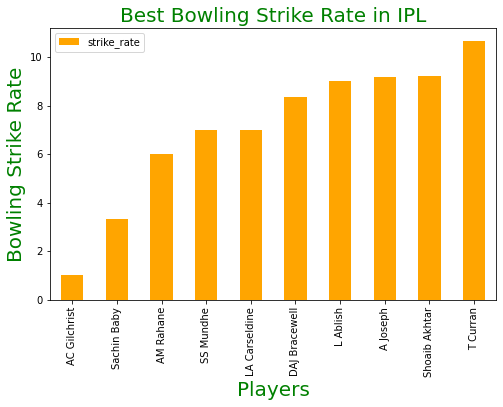

In [93]:
bowler_strike_rate.groupby('bowler')['strike_rate'].sum().sort_values(ascending = True).head(10).plot(kind='bar',
                                                                                figsize=(8,5),color = 'orange',legend=True)

plt.title('Best Bowling Strike Rate in IPL',fontdict={'fontsize':20,'fontweight':5,'color':'green'})
plt.xlabel("Players", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.ylabel("Bowling Strike Rate", fontdict={'fontsize':20,'fontweight':15,'color':'green'})
plt.show()

# 4. Conclusion

- Mumbai has maximum 3 stadiums among all the cities that hosted IPL.
- Mumbai has hosted maximum 101 matches.
- The highest numbers of matches as played in season was 2011,2012,2013.
- The M. Chinnaswamy Stadium hosted maximum 80 IPL matches.
- The maximum no of 10 teams participated in 2011 season.
- The Mumbai Indians team has most number of 109 matches.
- In the IPL league match team winning the toss and prefer to field than batting has 61% chance.
- Teams winning tosses and elected to field first have won most number of times with a percentage of 53%.
- Most teams field first after winning toss except for Chennai Super Kings,Deccan Chargers and Pune Warriors has mostly opted to bat first.
- The teams batting second have won more matches in IPL except for 2010,2013 and 2015.
- The team batting second have a win percentage of 61%.
- In the final match the team winning the toss and prefer to bat first over fielding has 58% chance.
- In the final the teams winning tosses and elected to field first have won most number of times with a   percentage of 66%.
- Mumbai Indians has most number of 4 IPL titles.
- Mumbai Indians has most number of 4 match winners in IPL final.
- In every final there are different match winners.
- Chris Gayle have been match winner on 21 ocassions.
- SK Raina has played most 162 IPL matches.
- Run scoring has gone up from the start of the IPL in 2008 with maximum runs in 2012 and 2013.
- Virat Kohli has scored most 5434 runs in IPL matches.
- Mumbai Indian have scored maximum 2588 Four in IPL.
- Royal Challengers Bangalore  have scored maximum 1132 Six in IPL.
- Shikhar Dhawan has scored maximum 526 Four in IPL.
- Chris Gayle  have scored maximum 327 Six in IPL.
- In 2013 season there were maximum Four and Six scored in IPL.
- Falling Wickets has gone up from the start of the IPL in 2008 with maximum wickets in 2013.
- Lasith Malinga has taken maximum 188 wickets in IPL.
- The maximum wickets have falling 2013 season with 912 wickets.
- The most players are dismissed from Mumbai Indians i.e. 1231.
- RG Sharma has dismissed maximum times in IPL.
- SL Malinga has given the most extra runs 221 in IPL.
- Mumbai Indians have the maximum extra runs 1340 in IPL.
- In 2013 there were maximum 936 extra runs given in IPL.
- The most dismissal in IPL are by caught out i.e. 5348.
- SK Raina has most successful fielder with 133 dismissal in IPL
- BS Stanlake has the best strike rate among all batsman in IPL with 250.00.
- Adam Gilchrist has the best strike rate among all bowlers in IPL 1.00.

# 5. Recommendations

- Winning toss is an important in IPL
- Team prefer to bowl first as there is 61% chance of winning while batting second.
- A company must endorse Mumbai Indian team which is the most successful team in IPL with 4 titles 
- The top players that a company can endorse due to following reasons.
   - SK Raina: Most Experienced Player
   - Virat Kohli: Most IPL Runs
   - Lasith Malinga: Most IPL wickets
   - Chris Gayle: Most Six hit
   - Shikhar Dhawan: Most Four Hit
   - BS Stanlake: Best Batting Strike Rate
   - Adam Gilchrist: Best Bowling Strike Rate
